In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data.dataset import random_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

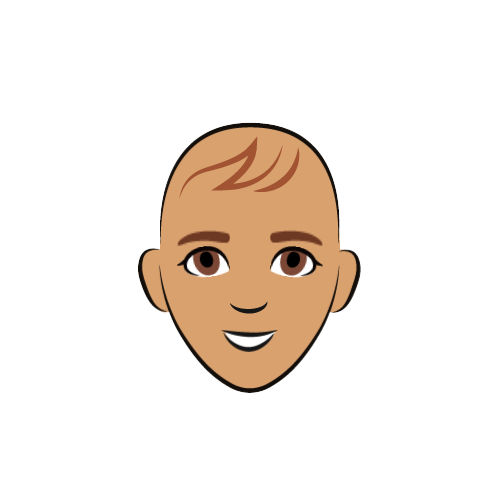

In [3]:
with Image.open(r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\cartoon_set\img\73.png') as im:
    display(im)


In [5]:
path = r'C:\\Users\\salda\\Documents\\Tanulas\\4th_year\\ELEC0134_AMLS1\\dataset_AMLS_22-23\\cartoon_set\\img\\'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  10000


In [6]:
# Creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  10000
Rejects: 0


In [7]:
# Converting list to a DataFrame
df = pd.DataFrame(img_sizes)

# Running summary statistics on image widths
df[0].describe()

count    10000.0
mean       500.0
std          0.0
min        500.0
25%        500.0
50%        500.0
75%        500.0
max        500.0
Name: 0, dtype: float64

In [8]:
# Running summary statistics on image heights
df[1].describe()

count    10000.0
mean       500.0
std          0.0
min        500.0
25%        500.0
50%        500.0
75%        500.0
max        500.0
Name: 1, dtype: float64

## Image sizes match up

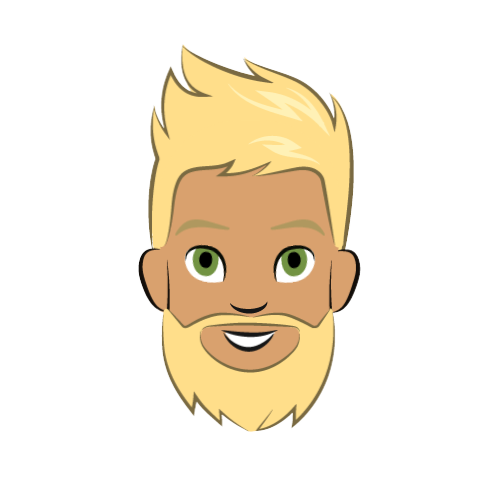

In [12]:
man = Image.open(r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\cartoon_set\img\33.png')
# Open the image and convert it to RGB
display(man)

torch.Size([4, 500, 500])


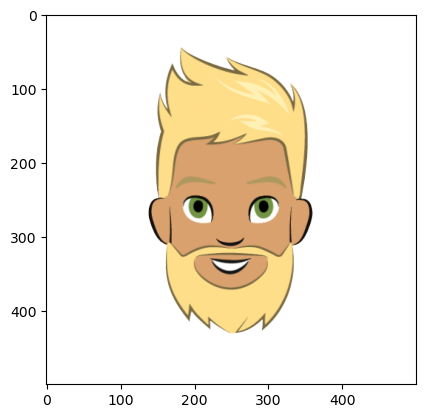

In [13]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(man)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

"If an image has 4 channels, it is likely that it is a 24-bit RGBA image, where the "A" stands for alpha channel. The alpha channel is an additional 8-bit channel that is used to store transparency information for the image. When an image is displayed, the alpha channel values are used to composite the image over others using alpha blending. This allows the image to have transparent or semi-transparent areas, which can be useful for compositing images or for creating effects like drop shadows."

#### Given this information I chose to get rid of the alpha channel and convert it to an RGB array to the necessary transforms can be applied.

torch.Size([3, 500, 500])


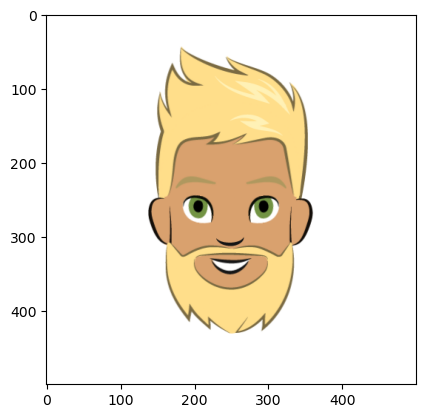

In [18]:
image = man.convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(image)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


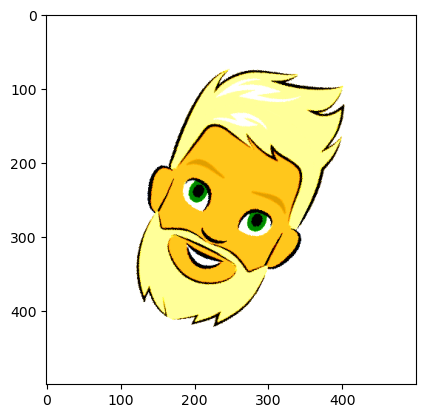

In [33]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30, fill=256), # Filling rotated areas with white
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(image)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

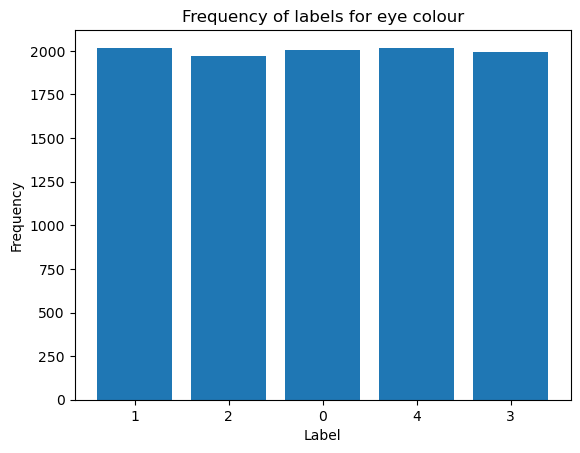

In [40]:
label_file = r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\cartoon_set\labels.xlsx'
eyelabels= pd.read_excel(label_file, usecols=[1], names=['eye_color'])['eye_color'].tolist()

label_counts = {}

for label in eyelabels:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Generate frequency plot
labels = list(label_counts.keys())
frequencies = list(label_counts.values())
x_pos = range(len(labels))
plt.bar(x_pos, frequencies, align='center')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of labels for eye colour')
plt.xticks(x_pos, labels)
plt.show()

Dataset is balanced


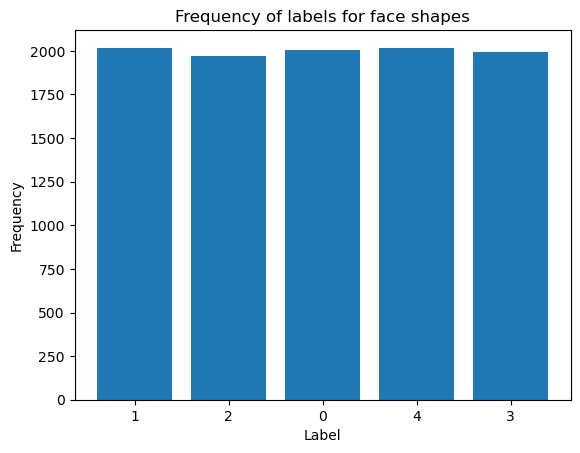

In [41]:
label_file = r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\cartoon_set\labels.xlsx'
facelabels= pd.read_excel(label_file, usecols=[1], names=['face_shape'])['face_shape'].tolist()

label_counts = {}

for label in facelabels:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Generate frequency plot
labels = list(label_counts.keys())
frequencies = list(label_counts.values())
x_pos = range(len(labels))
plt.bar(x_pos, frequencies, align='center')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of labels for face shapes')
plt.xticks(x_pos, labels)
plt.show()

Dataset is balanced